In [14]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

In [15]:
img = cv.imread('input/dice6.png')
gray_img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
# plt.imshow(image)

In [16]:
# Find contours and hierarchy
_, gray_img = cv.threshold(gray_img, 127, 255, cv.THRESH_BINARY)
contours, hierarchy = cv.findContours(gray_img, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)

Dice 1 has 0 points.
Dice 2 has 6 points.
Dice 3 has 5 points.
Dice 4 has 4 points.
Dice 5 has 3 points.
Dice 6 has 2 points.


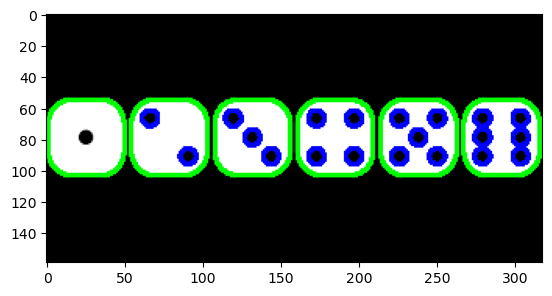

In [17]:
num_points = 0
num_dice = 0
for i, contour in enumerate(contours):
    current_hierarchy = hierarchy[0][i]
    # Check if the contour has a parent
    if current_hierarchy[3] != -1:
        # This is a child contour, likely representing the points inside the dice
        cv.drawContours(img, [contour], -1, (0, 0, 255), 2)
        # Count the number of child contours (points)
        num_points += 1
    else:        
        # This is a top-level contour, likely representing the dice
        cv.drawContours(img, [contour], -1, (0, 255, 0), 2)
        print(f"Dice {num_dice} has {num_points} points.")
        num_points = 0
        num_dice += 1
        plt.imshow(img, cmap='gray')